<a href="https://colab.research.google.com/github/deep-son/Graduate-Admission/blob/master/Graduate_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression


%matplotlib inline

### Input data

In [2]:
add_df = pd.read_csv("./Admission_Predict_Ver1.1.csv") 
add_df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
add_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# removing extra index column
add_df.drop(columns=['Serial No.'],inplace=True)

In [5]:
# renaming columns forbetter clarity
add_df.rename(columns={'Chance of Admit ':'Chance of Admit','LOR ':'LOR'},inplace=True)
add_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

### Data Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d72f7c278>,
      dtype=object)

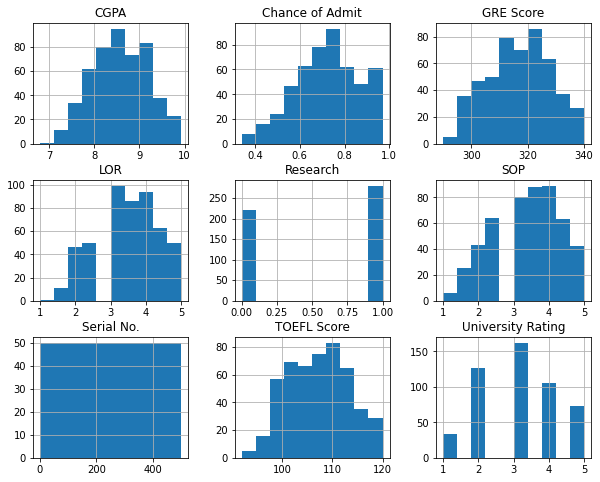

In [6]:
add_df.hist(bins=10,figsize=(10,8))

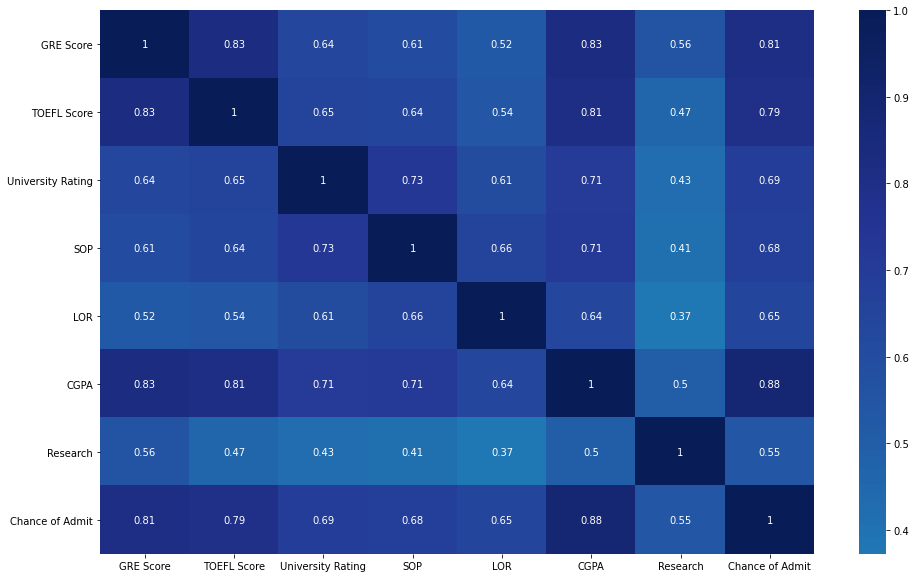

In [9]:
plt.figure(figsize = (16,10))
sns.heatmap(add_df.corr(),annot=True,center=0, cmap="YlGnBu")

We can see that all the columns have a strong positive corelation with output column
1. GRE score is strongly co-related with TOEFL Score, reason behind this could be GRE verbal section has some similarity to TOEFL test which is also based on verbal skills
2. GRE score is also strongly co-related with CGPA, reason behind this could be higher academic score could lead  potentially higher GRE score, same in the case of TOEFL score

In [10]:
add_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

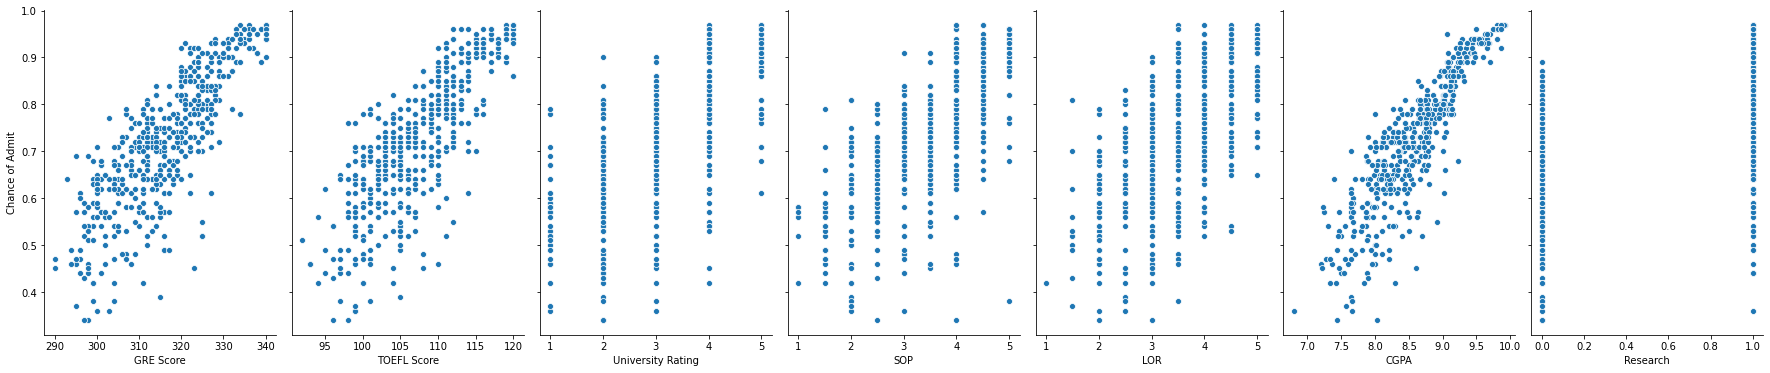

In [ ]:
sns.pairplot(add_df, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],y_vars=['Chance of Admit'],height=5, aspect=0.7)

Linear relation between input features and output features can be visualized

,Chance of Admit
Research,
1,0.789964
0,0.634909


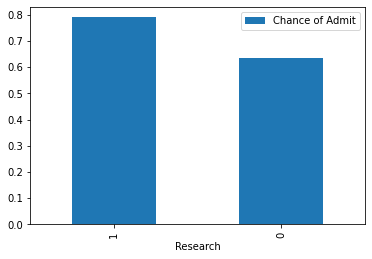

In [16]:
add_df[['Research','Chance of Admit']].groupby(by='Research').mean().sort_values(by='Chance of Admit',ascending=False).plot(kind='bar')
add_df[['Research','Chance of Admit']].groupby(by='Research').mean().sort_values(by='Chance of Admit',ascending=False)

Students with Research experience are more likely to be admitted

,Chance of Admit
University Rating,
5,0.888082
4,0.801619
3,0.702901
2,0.626111
1,0.562059


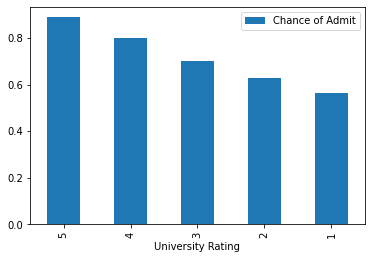

In [17]:
add_df[['University Rating','Chance of Admit']].groupby(by='University Rating').mean().sort_values(by='Chance of Admit',ascending=False).plot(kind='bar')
add_df[['University Rating','Chance of Admit']].groupby(by='University Rating').mean().sort_values(by='Chance of Admit',ascending=False)

(1 - highest and 5 - lowest)

--- 

HIgher the University rating lower are the chances of getting admit

---

,Chance of Admit
SOP,
5.0,0.885000
4.5,0.850000
4.0,0.782809
3.5,0.712045
3.0,0.678500
2.5,0.645312
2.0,0.589535
1.5,0.546400
1.0,0.538333


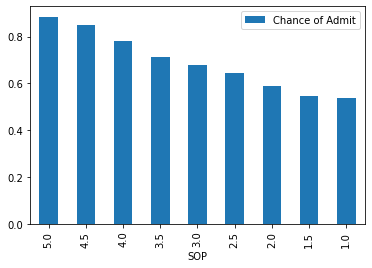

In [81]:
add_df[['SOP','Chance of Admit']].groupby(by='SOP').mean().sort_values(by='Chance of Admit',ascending=False).plot(kind='bar')
add_df[['SOP','Chance of Admit']].groupby(by='SOP').mean().sort_values(by='Chance of Admit',ascending=False)

,Chance of Admit
LOR,
5.0,0.872600
4.5,0.831905
4.0,0.764149
3.5,0.723023
3.0,0.668485
2.5,0.640600
2.0,0.568261
1.5,0.550000
1.0,0.420000


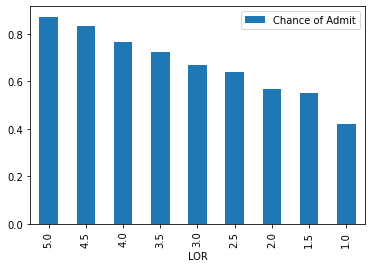

In [82]:
add_df[['LOR','Chance of Admit']].groupby(by='LOR').mean().sort_values(by='Chance of Admit',ascending=False).plot(kind='bar')
add_df[['LOR','Chance of Admit']].groupby(by='LOR').mean().sort_values(by='Chance of Admit',ascending=False)

### Scaling Data

In [18]:
#scaling the data
add_df_norm = add_df.copy()
scaler = MinMaxScaler()
column_names_to_normalize = ['CGPA', 'GRE Score', 'LOR', 'SOP','TOEFL Score']
x = add_df_norm[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = add_df_norm.index)
add_df_norm[column_names_to_normalize] = df_temp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d6d1866a0>,
      dtype=object)

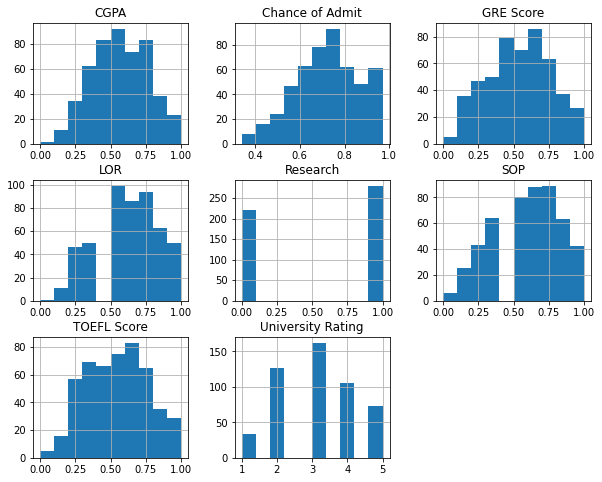

In [12]:
add_df_norm.hist(bins=10,figsize=(10,8))

### Models

In [131]:
add_df1 = add_df_norm.copy()
y = add_df1['Chance of Admit']
add_df1.drop(columns=['Chance of Admit'],inplace=True)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(add_df1, y, test_size=0.2,random_state=1)

#### Linear Models

##### Linear Regression

In [133]:
model1 = Pipeline([('scaler',MinMaxScaler()),('clf',linear_model.LinearRegression())])

model1.fit(X_train, y_train)
pred = model1.predict(X_test)

MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
Rsq = metrics.r2_score(y_test, pred)

print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))


MSE:0.0034590988971363824  RMSE:0.05881410457650769  R-Squared:0.8208741703103732


,Feature,Coefficient
5,CGPA,0.364117
0,GRE Score,0.091612
1,TOEFL Score,0.088870
4,LOR,0.050494
2,University Rating,0.024515
6,Research,0.019890
3,SOP,0.012020


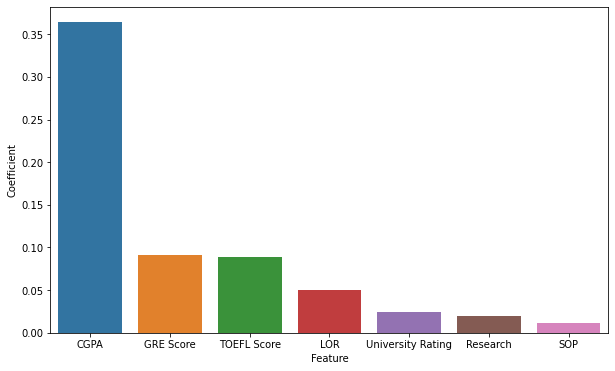

In [134]:
coef_df1 = pd.DataFrame(zip(X_train.columns,model1.named_steps['clf'].coef_),columns=['Feature','Coefficient'])
coef_df1.sort_values(by='Coefficient',inplace=True, ascending=False)

plt.figure(figsize = (10,6))
sns.barplot(x='Feature',y='Coefficient',data=coef_df1)
coef_df1

In [135]:
#model without SOP considering score
add_df2 = add_df_norm.copy()
y = add_df2['Chance of Admit']
add_df2.drop(columns=['Chance of Admit','SOP'],inplace=True)

X_train1, X_test1, y_train1, y_test1 = train_test_split(add_df2, y, test_size=0.2,random_state=1)




In [136]:
# we can use the same model1 from above

model1.fit(X_train1, y_train1)
pred = model1.predict(X_test1)

MSE = metrics.mean_squared_error(y_test1, pred)
RMSE = np.sqrt(MSE)
Rsq = metrics.r2_score(y_test1, pred)

print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))

MSE:0.0034477260004029614  RMSE:0.058717339861432426  R-Squared:0.8214631039095355



 <table>
  <tr>
    <th>Columns</th>
    <th>RMSE</th>
    <th>R-squared</th>
  </tr>
  <tr>
    <th>With SOP</th>
    <td>0.058814</td>
    <td>0.82087</td>
  </tr>
  <tr>
    <th>Without SOP</th>
    <td>0.058717</td>
    <td>0.82146</td>
  </tr>
</table> 



Our model performs slightly better without considering SOP score

Therefore, CGPA is the most important factor for higher admit chances and SOP score is the least important feature

##### SVM regressor

In [140]:
model2 = Pipeline([('scaler',MinMaxScaler()),('clf',SVR(kernel='linear'))])

model2.fit(X_train1, y_train1)
pred = model2.predict(X_test1)

MSE = metrics.mean_squared_error(y_test1, pred)
RMSE = np.sqrt(MSE)
Rsq = metrics.r2_score(y_test1, pred)

print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))


MSE:0.00394142475787421  RMSE:0.06278076742023954  R-Squared:0.7958974285187608


,Feature,Coefficient
4,LOR,0.312285
1,TOEFL Score,0.141358
0,GRE Score,0.079839
3,SOP,0.055947
2,University Rating,0.024091
5,CGPA,0.015036


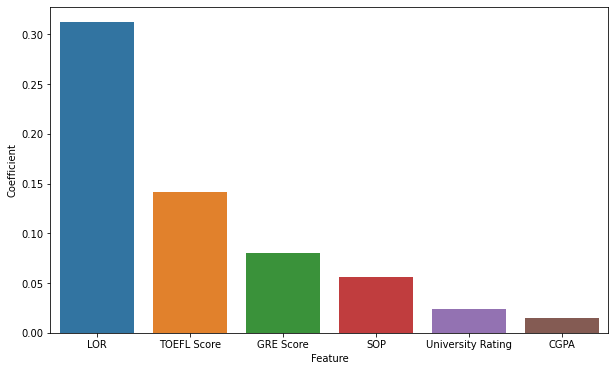

In [141]:
coef_df2 = pd.DataFrame(zip(X_train.columns,model2.named_steps['clf'].coef_[0]),columns=['Feature','Coefficient'])
coef_df2.sort_values(by='Coefficient',inplace=True, ascending=False)

plt.figure(figsize = (10,6))
sns.barplot(x='Feature',y='Coefficient',data=coef_df2)
coef_df2

#### Tree based Models

In [147]:
model3 = make_pipeline(DecisionTreeRegressor())

model3.fit(X_train1, y_train1)
pred = model4.predict(X_test1)

MSE = metrics.mean_squared_error(y_test1, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test1, pred))

Rsq = metrics.r2_score(y_test1, pred)

print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))


MSE:0.004594926725000001  RMSE:0.06778588883388637  R-Squared:0.7620565105380352


In [145]:
model4 = make_pipeline(RandomForestRegressor(random_state=1,n_estimators= 200))

model4.fit(X_train1, y_train1)
pred = model4.predict(X_test1)

MSE = metrics.mean_squared_error(y_test1, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test1, pred))

Rsq = metrics.r2_score(y_test1, pred)

print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))


MSE:0.004594926725000001  RMSE:0.06778588883388637  R-Squared:0.7620565105380352


In [146]:
model5 = make_pipeline(ExtraTreesRegressor())

model5.fit(X_train, y_train)
pred = model5.predict(X_test)

MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
Rsq = metrics.r2_score(y_test, pred)


print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))


MSE:0.004522371499999998  RMSE:0.06724857991065683  R-Squared:0.7658137072135054


### Result

By far Simple Linear Regression performs the best to estimate the chances of admit
- Training accuracy of the model can be improved with additinal data 
- Boosting algorithms and regularization can also be used 